In [ ]:
# Problem Description
# Consider an inventory problem with 2 different products and an infinite time horizon
# • At every timestep, the demand for the first product can either be 0 or 1, both with probability 0.5
# • Similarly, the demand per timestep for the second product is also 0 or 1, both with probability 0.5
# • Lost sales must be avoided, i.e. there should always be at least 1 item of each product in your inventory
# • You have a limited storage capacity of 20 items per product
# Note that the demand as well as the storage capacity for both products are fully independent of each other
# • At every timestep, you could order any amount of the first and second product at the same time
# • Every order has a fixed total cost of 5, regardless on the ordered amount of items/products
# • Orders arrive at the end of the timestep (so can be sold the next timestep the earliest)
# • The cost per timestep for holding a single item in stock is 1 for the first product and 2 for the second product

# Simulating the average cost

In [31]:
#For now, assume the order policy is fixed: Only when the inventory of one of the products is 1, you order such that the inventory level of both products becomes 5 (before any potential sales for that timestep take place).

#c) Simulate the system for a long period under the given policy. Report the the long-run average costs.

import numpy as np

# consider all possible initial states

running_costs = np.zeros((20,20))

current_state = np.zeros((20,20,2))

# initialize the current state

for i in range(1,21):
    for j in range(1,21):
        current_state[i-1,j-1] = [i,j]

n_timesteps = 10000

# create a matrix to store the random values for the simulation

random_values = np.random.rand(20,20,2,n_timesteps)

In [5]:
(current_state[:,:,0] == 1).shape

(20, 20)

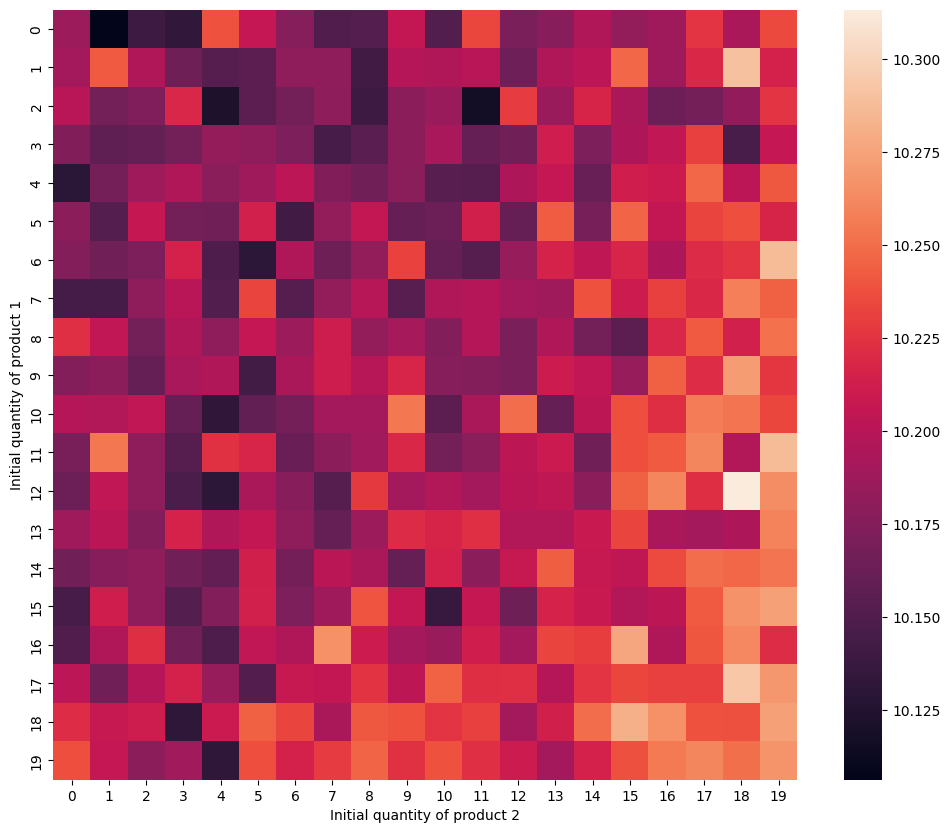

In [ ]:


# simulate the system

for t in range(n_timesteps):

    # simulate the holding costs
    # the holding costs are 1 for the first product and 2 for the second product

    running_costs += current_state[:,:,0] + 2*current_state[:,:,1] 

    ## all the elements in the current state that are 1 should be ordered so that the inventory level of both products becomes 5

    running_costs[(current_state[:,:,0] == 1) | (current_state[:,:,1] == 1)] += 5


    current_state[current_state == 1] = 5

    ## simulate the demand for the products

    current_state[:,:,:] -= (random_values[:,:,:,t] < 0.5).astype(int)



# calculate the average costs

average_costs = running_costs / n_timesteps


# plot the average costs matrix to see the costs for each initial state using seaborn's heatmap

import seaborn as sns


import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

sns.heatmap(average_costs)

plt.xlabel("Initial quantity of product 2")

plt.ylabel("Initial quantity of product 1")


plt.show()

# Bellman value iteration

In [1]:
from main import question_f

In [2]:
v, phi, policy = question_f()

Value iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Value iteration: 100%|██████████| 10000/10000 [01:43<00:00, 96.49it/s]


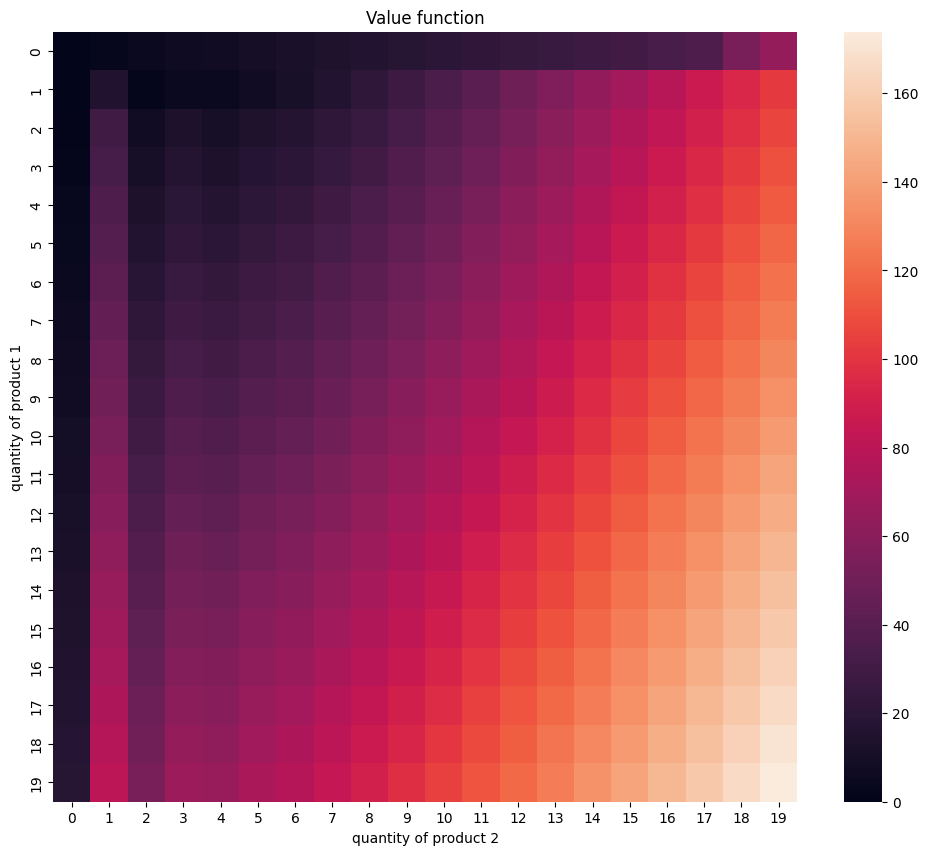

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# reshape the policy matrix to be able to use it in the simulation

policy2d = policy.reshape(20,20,2)

v2d = v.reshape((20,20), order= "C")

phi2d = phi.reshape((20,20), order= "C")


# plot v and phi using seaborn's heatmap    

plt.figure(figsize=(12,10))

sns.heatmap(v2d)

plt.xlabel("quantity of product 2")

plt.ylabel("quantity of product 1")

plt.title("Value function")

plt.show()




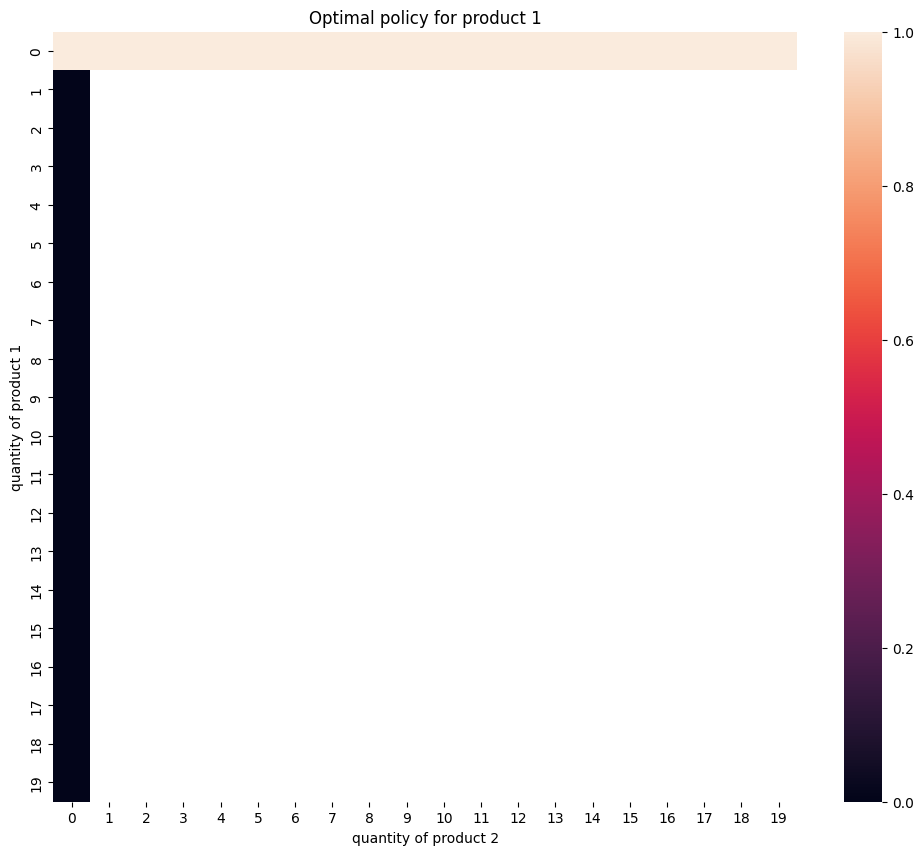

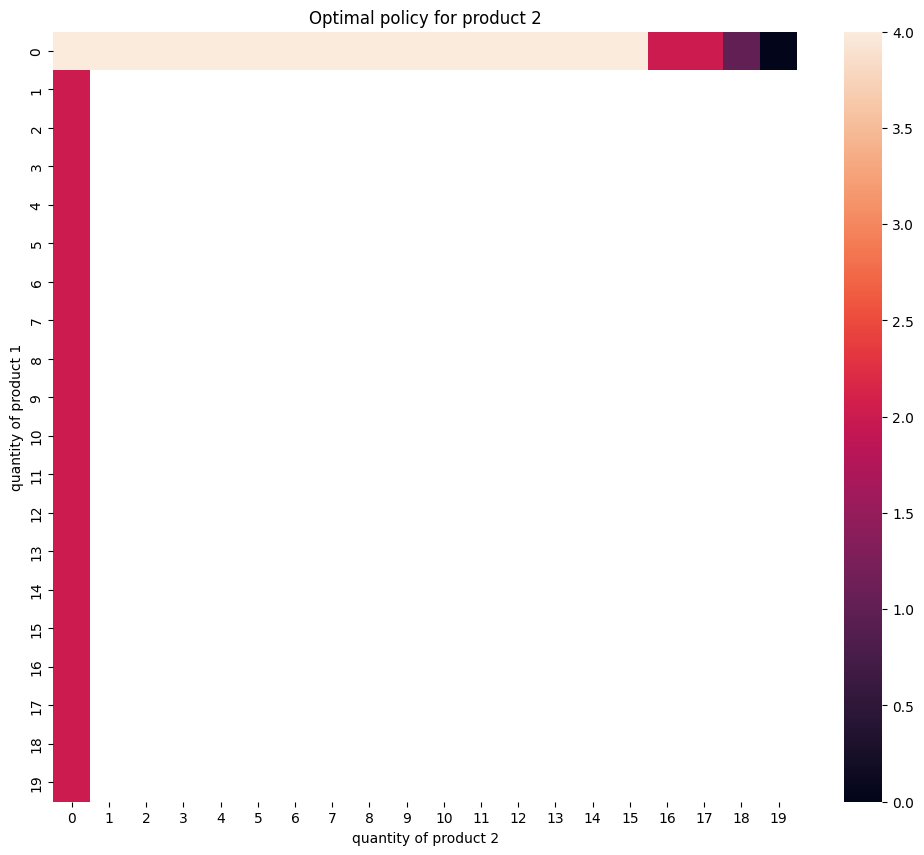

In [20]:
# plot the policy2d matrix 

plt.figure(figsize=(12,10))

sns.heatmap(policy[:,0].reshape((20,20), order='C'))

plt.xlabel("quantity of product 2")

plt.ylabel("quantity of product 1")

plt.title("Optimal policy for product 1")

plt.show()

plt.figure(figsize=(12,10))

sns.heatmap(policy[:,1].reshape((20,20), order='C'))

plt.xlabel("quantity of product 2")

plt.ylabel("quantity of product 1")

plt.title("Optimal policy for product 2")

plt.show()


In [ ]:
#